In [1]:
# plotting libraries
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

# data analysis libraries
import pandas as pd
import numpy as np

# general imports
from pathlib import Path

# auxiliary functions
import s3ts.analysis as aux

In [2]:
df = aux.load_data(Path("results_synced/atlas_ratio_legacy/"))
df["dataset"].value_counts()

PowerCons    150
GunPoint     150
Coffee       150
Plane         40
Name: dataset, dtype: int64

In [10]:
dfr = aux.EXP_ratio_preprocessing(df)
dfr

,arch,dataset,nsamp_pre,nsamp_tra,pretrain_val_acc_mean,pretrain_val_acc_std,pretrain_val_auroc_mean,pretrain_val_auroc_std,pretrain_val_f1_mean,pretrain_val_f1_std,target_test_acc_mean,target_test_acc_std,target_test_auroc_mean,target_test_auroc_std,target_test_f1_mean,target_test_f1_std
0,CNN_DFS,Coffee,0,683,NaN,NaN,NaN,NaN,NaN,NaN,0.430809,0.040148,0.444642,0.034539,0.430809,0.040148
1,CNN_DFS,Coffee,1998,683,0.535182,0.167845,0.860709,0.029082,0.535182,0.167845,0.427743,0.038213,0.433354,0.032272,0.427743,0.038213
2,CNN_DFS,Coffee,3997,683,0.678322,0.077874,0.875236,0.037124,0.678322,0.077874,0.445884,0.015863,0.407861,0.041301,0.445884,0.015863
3,CNN_DFS,Coffee,5996,683,0.759839,0.116503,0.922436,0.053926,0.759839,0.116503,0.456601,0.012880,0.448273,0.015398,0.456601,0.012880
4,CNN_DFS,Coffee,7995,683,0.798130,0.100388,0.937191,0.043001,0.798130,0.100388,0.437519,0.041648,0.446854,0.011338,0.437519,0.041648
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,CNN_DFS,PowerCons,6246,10497,0.568461,0.031956,0.856358,0.017235,0.568461,0.031956,0.599884,0.056307,0.711420,0.044191,0.599884,0.056307
116,CNN_DFS,PowerCons,12492,10497,0.594569,0.027069,0.862619,0.014625,0.594569,0.027069,0.610490,0.061793,0.697664,0.042606,0.610490,0.061793
117,CNN_DFS,PowerCons,18739,10497,0.619562,0.040600,0.874895,0.017506,0.619562,0.040600,0.623703,0.068275,0.716927,0.064369,0.623703,0.068275
118,CNN_DFS,PowerCons,24985,10497,0.608050,0.038669,0.881147,0.008406,0.608050,0.038669,0.596658,0.058295,0.705514,0.062595,0.596658,0.058295


In [11]:
baseline = dfr.groupby(["arch", "dataset", "nsamp_tra"])[["target_test_acc_mean", "target_test_acc_std"]].first()
baseline

target_test_acc_mean  target_test_acc_std
arch    dataset   nsamp_tra                                           
CNN_DFS Coffee    683                    0.430809             0.040148
                  1366                   0.423087             0.035256
                  2050                   0.489520             0.095819
                  2733                   0.510020             0.045843
                  3417                   0.525976             0.011214
        GunPoint  1227                   0.500652             0.016922
                  2454                   0.534069             0.064661
                  3681                   0.498246             0.026672
                  4908                   0.608254             0.067240
                  6135                   0.658179             0.045854
        Plane     1235                   0.253274             0.028364
                  2470                   0.132024             0.017933
                  3706                   0.438588                  NaN
                  4941                   0.430134                  NaN
                  6177                   0.527267                  NaN
        PowerCons 2099                   0.596677             0.061205
                  4198                   0.637748             0.043787
                  6298                   0.568743             0.077897
                  8397                   0.609118             0.060830
                  10497                  0.606587             0.056203

Text(0, 0.5, 'f1')

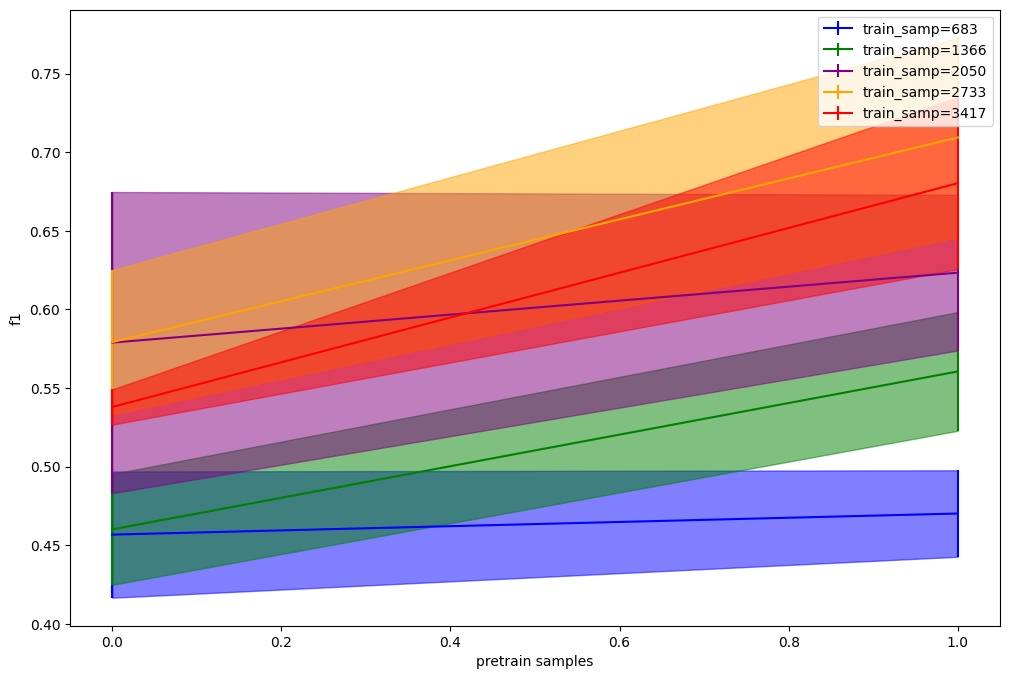

In [ ]:
dfs: pd.DataFrame = xd

metric = "f1"

colors = ["blue", "green", "purple", "orange", "red"]
fig, ax = plt.subplots(figsize=[12,8])#plt.subplots(subplot_kw={"projection": "3d"})
for i, (nsamp, dfg) in enumerate(dfs.groupby(dfs["nsamp_tra"])):
    ax.errorbar(dfg["pretrained"], dfg[f"target_test_{metric}_mean"], yerr=dfg[f"target_test_{metric}_std"], 
                label=f'train_samp={dfg["nsamp_tra"].unique()[0]}', c=colors[i])
    ax.fill_between(dfg["pretrained"], y1=dfg[f"target_test_{metric}_mean"]+dfg[f"target_test_{metric}_std"], 
        y2=dfg[f"target_test_{metric}_mean"]-dfg[f"target_test_{metric}_std"], alpha = 0.5, color=colors[i])
plt.legend()
plt.xlabel("pretrain samples")
plt.ylabel(metric)

In [3]:
dfs = df[df["dataset"] == ds].copy()
dfs = fix_close_vals(dfs,  "nsamp_pre")


cols = [c for c in dfs.columns if ("target_test" in c) or (("pretrain_val" in c) )]
xd0 = dfs[dfs["pretrained"] == False].groupby(["nsamp_tra"])[cols].mean()
xd1 = dfs.groupby(["nsamp_tra", "nsamp_pre"])[cols].max()
xd2 = dfs.groupby(["nsamp_tra", "nsamp_pre"])[cols].std()
print(dfs["nsamp_pre"].unique())

xd1.columns = [c + "_mean" for c in xd1.columns]
xd2.columns = [c + "_std" for c in xd2.columns]
xd = pd.concat([xd1, xd2], axis=1).reset_index()
xd.replace(np.NaN, 0, inplace=True)
xd

NameError: name 'df' is not defined

In [4]:
dfs: pd.DataFrame = xd

metric = "f1"

colors = ["blue", "green", "purple", "orange", "red"]
fig, ax = plt.subplots(figsize=[12,8])#plt.subplots(subplot_kw={"projection": "3d"})
for i, (nsamp, dfg) in enumerate(dfs.groupby(dfs["nsamp_tra"])):
    ax.errorbar(dfg["nsamp_pre"], dfg[f"target_test_{metric}_mean"], yerr=dfg[f"target_test_{metric}_std"], 
                label=f'train_samp={dfg["nsamp_tra"].unique()[0]}', c=colors[i])
    ax.fill_between(dfg["nsamp_pre"], y1=dfg[f"target_test_{metric}_mean"]+dfg[f"target_test_{metric}_std"], 
        y2=dfg[f"target_test_{metric}_mean"]-dfg[f"target_test_{metric}_std"], alpha = 0.5, color=colors[i])
plt.legend()
plt.xlabel("pretrain samples")
plt.ylabel(metric)

NameError: name 'xd' is not defined

In [5]:
xd = df[df["dataset"] == ds][["nsamp_tra", "nsamp_pre", "pretrained", "target_test_acc", 'target_best_model']]
xd[xd["nsamp_tra"] == 3417]

NameError: name 'df' is not defined

In [73]:
idx = 17
print(xd[xd["nsamp_tra"] == 3417].iloc[idx]["target_best_model"])
xd[xd["nsamp_tra"] == 3417].iloc[idx]

training/exp/EXP_ratio_f2.4_2023-02-26_22-51/logs/target/checkpoints/epoch=0-step=17.ckpt


nsamp_tra                                                         3417
nsamp_pre                                                         9995
pretrained                                                        True
target_test_acc                                               0.451613
target_best_model    training/exp/EXP_ratio_f2.4_2023-02-26_22-51/l...
Name: 239, dtype: object

<AxesSubplot: >

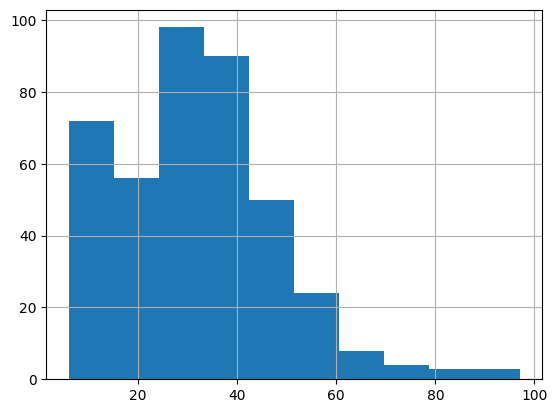

In [80]:
df[df["pretrained"]==True]["pretrain_nepochs"].hist()